# <DIV ALIGN='center'>BOLUM 9 
### <DIV ALIGN='center'>KMEAN

# <DIV ALIGN='center'><font color='red'>Ödev
    
Bu ödevin amacı, iris veri kümesine k-ortalama uygulamak ve k değerini değiştirdiğinde ne olacağını görmektir. Varsa, hangi çözümü en iyi olarak görüyorsunuz? Karmaşıklık bu veri kümesinde bir sorun olmaya başlıyor mu? Bulgularınızı mentörle paylaşın. 3'ten fazla kümey içeren bir sonuç bulabileceğinizi aklınızdan çıkarmayın.Bu kümelerden ikisi tek bir çiçek türüyle eşleşirken, diğer ikisi örneğin diğer türlerle eşlenir.

Bu ödevde, UC Irvine Machine Learning Repository'de bulunan kalp hastalığı veri setiyle çalışacaksınız.

Veri setini kullanmadan önce bazı ön işlemler yapmanız gerekiyor:

####  Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

#### Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

#### Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)
Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman karşılık gelen hastanın kalp hastalığı olduğunu ve y 0'a eşitse, hastanın kalp hastalığı olmadığını gösterir.

Hastaları "kalp hastalığı tanısı" veya "kalp hastalığı tanısı yok" kümelerine doğru şekilde atayan bir k-ortalama çözümü oluşturun. Bu durumda, aslında iki olan verideki doğru küme sayısını biliyoruz. Ancak burada, k-ortalamanın beklediğimiz şekilde gözlemleri atayıp atamadığını test edeceksiniz. K-ortalama, denetimsiz bir öğrenme algoritması olduğu için, hastaların kalp hastalığı olup olmadığına karşı kör olacaktır.



In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [2]:
#df = pd.read_csv('data/Iris.csv')

In [3]:
from sklearn import datasets

<font color='red'>IRIS DATA SET 

In [4]:
df = datasets.load_iris()

x[:,:] would mean u want every row and every column.

x[3,3] would mean u want the 3 row and the 3 column value

x[:3,:3] would mean u want the rows and columns until 3

x[:, 3] would mean u want the 3 column and every row

In [5]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
X = df.data[:, :]
y = df.target

Text(0, 0.5, 'Sepal Width')

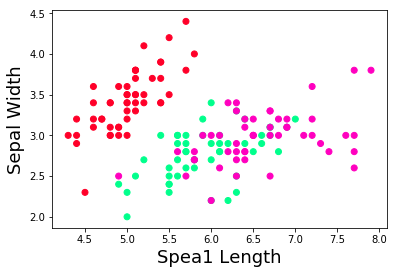

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [8]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Verilerimizde üç sınıf iris bitki türü bulunduğundan, n_clusters = 3 yaparak k-ortalama komutunu çalıştırıyoruz. Bu noktada sizden bu parametre ile oynamanızı ve sonuçları denemenizi istiyoruz:

In [9]:
# Defining the k-means
kmeans_küme = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_küme.fit(X_std)
y_pred = kmeans_küme.predict(X_std)

17.3 ms ± 670 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
kmeans_küme = KMeans(n_clusters=5, random_state=123)

# Fit model
%timeit kmeans_küme.fit(X_std)
y_pred = kmeans_küme.predict(X_std)

26.2 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
kmeans_küme = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_küme.fit(X_std)
y_pred = kmeans_küme.predict(X_std)

12.2 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Tahminleri ve gözlemlerin gerçek sınıfını görselleştirelim. İki boyutlu uzayda çizmek için, veri boyutunu azaltmamız gerekiyor. Bu amaçla, PCA'yı uyguluyoruz ve ilk iki ana bileşeni kullanıyoruz.

Aşağıdaki çizimde, sayılar her gözlem için algoritma tarafından atanan kümeyi göstermektedir. Renkler gerçek sınıfları gösterir.

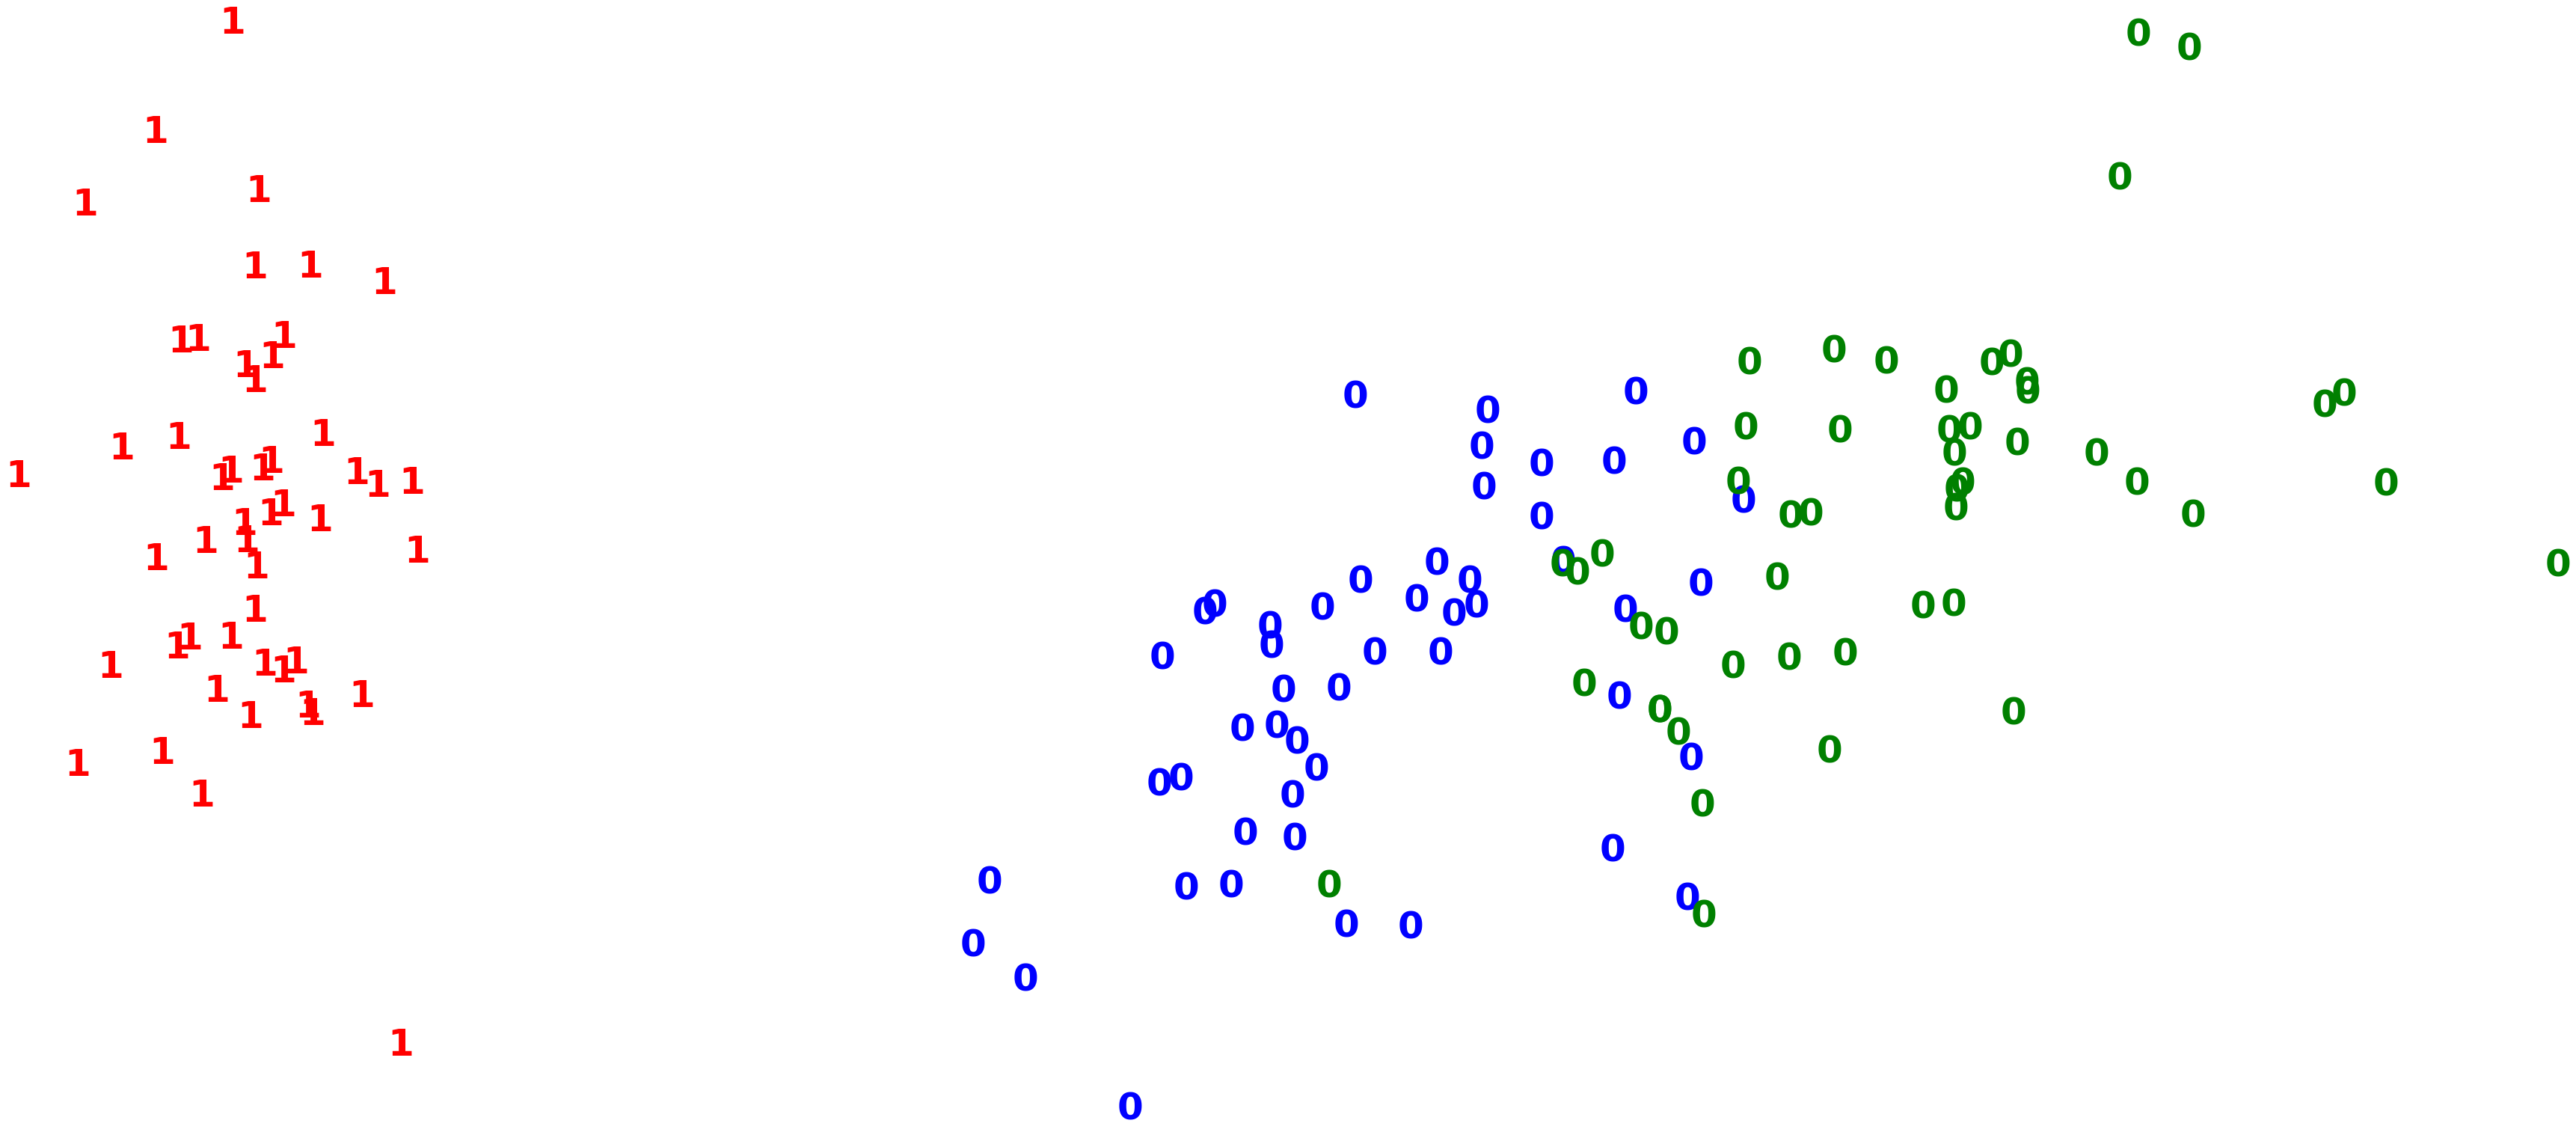

In [12]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

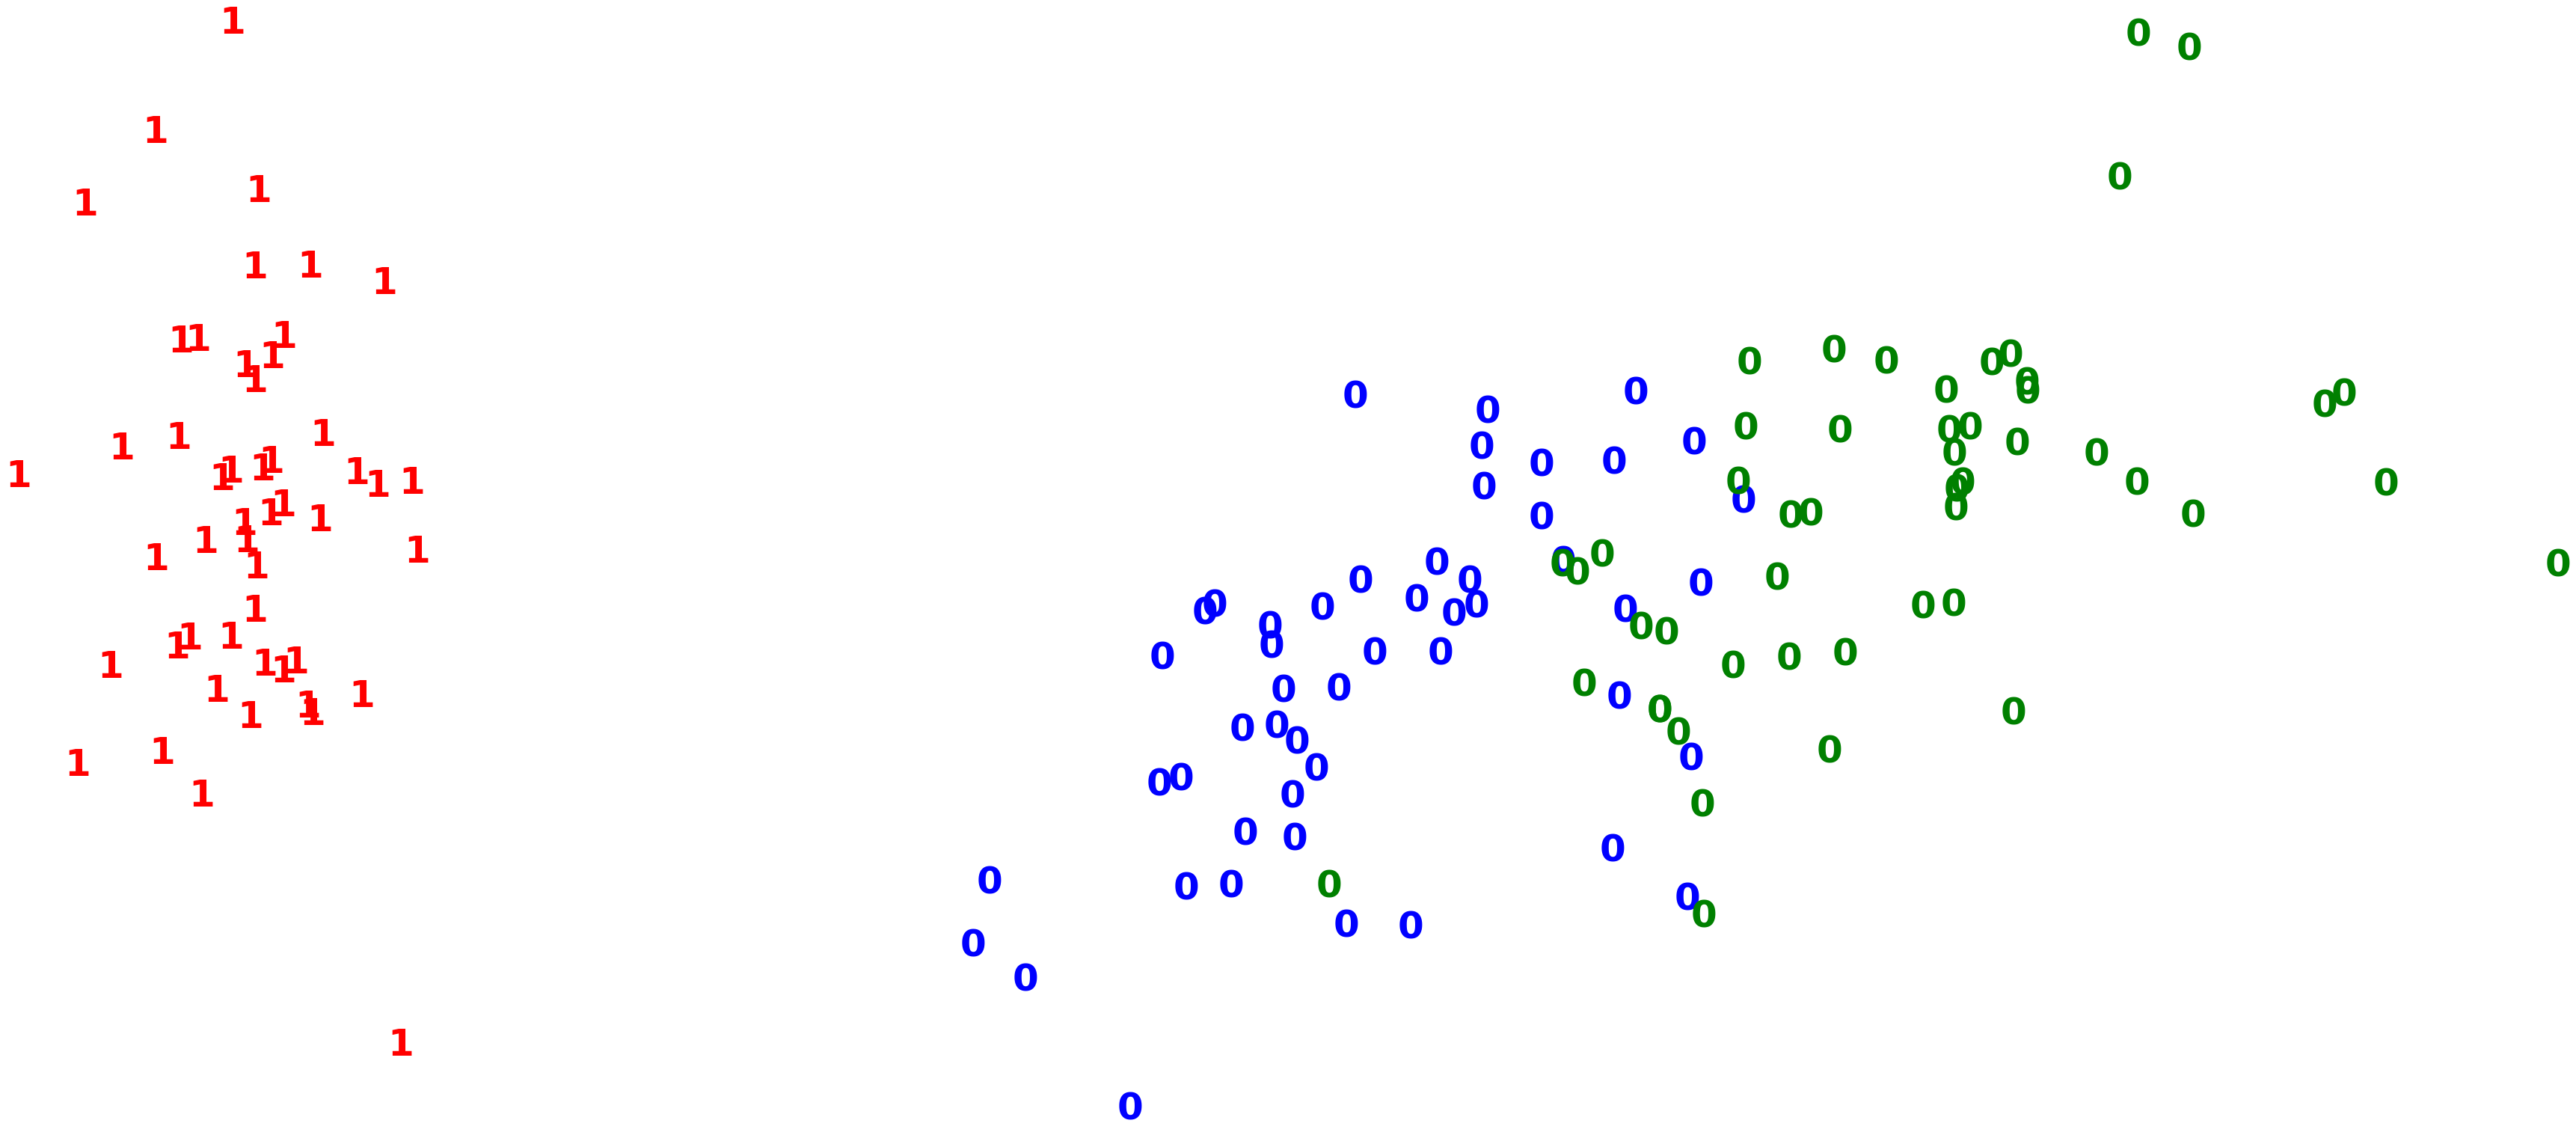

In [13]:
pca = PCA(n_components=3).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

11 ms ± 932 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


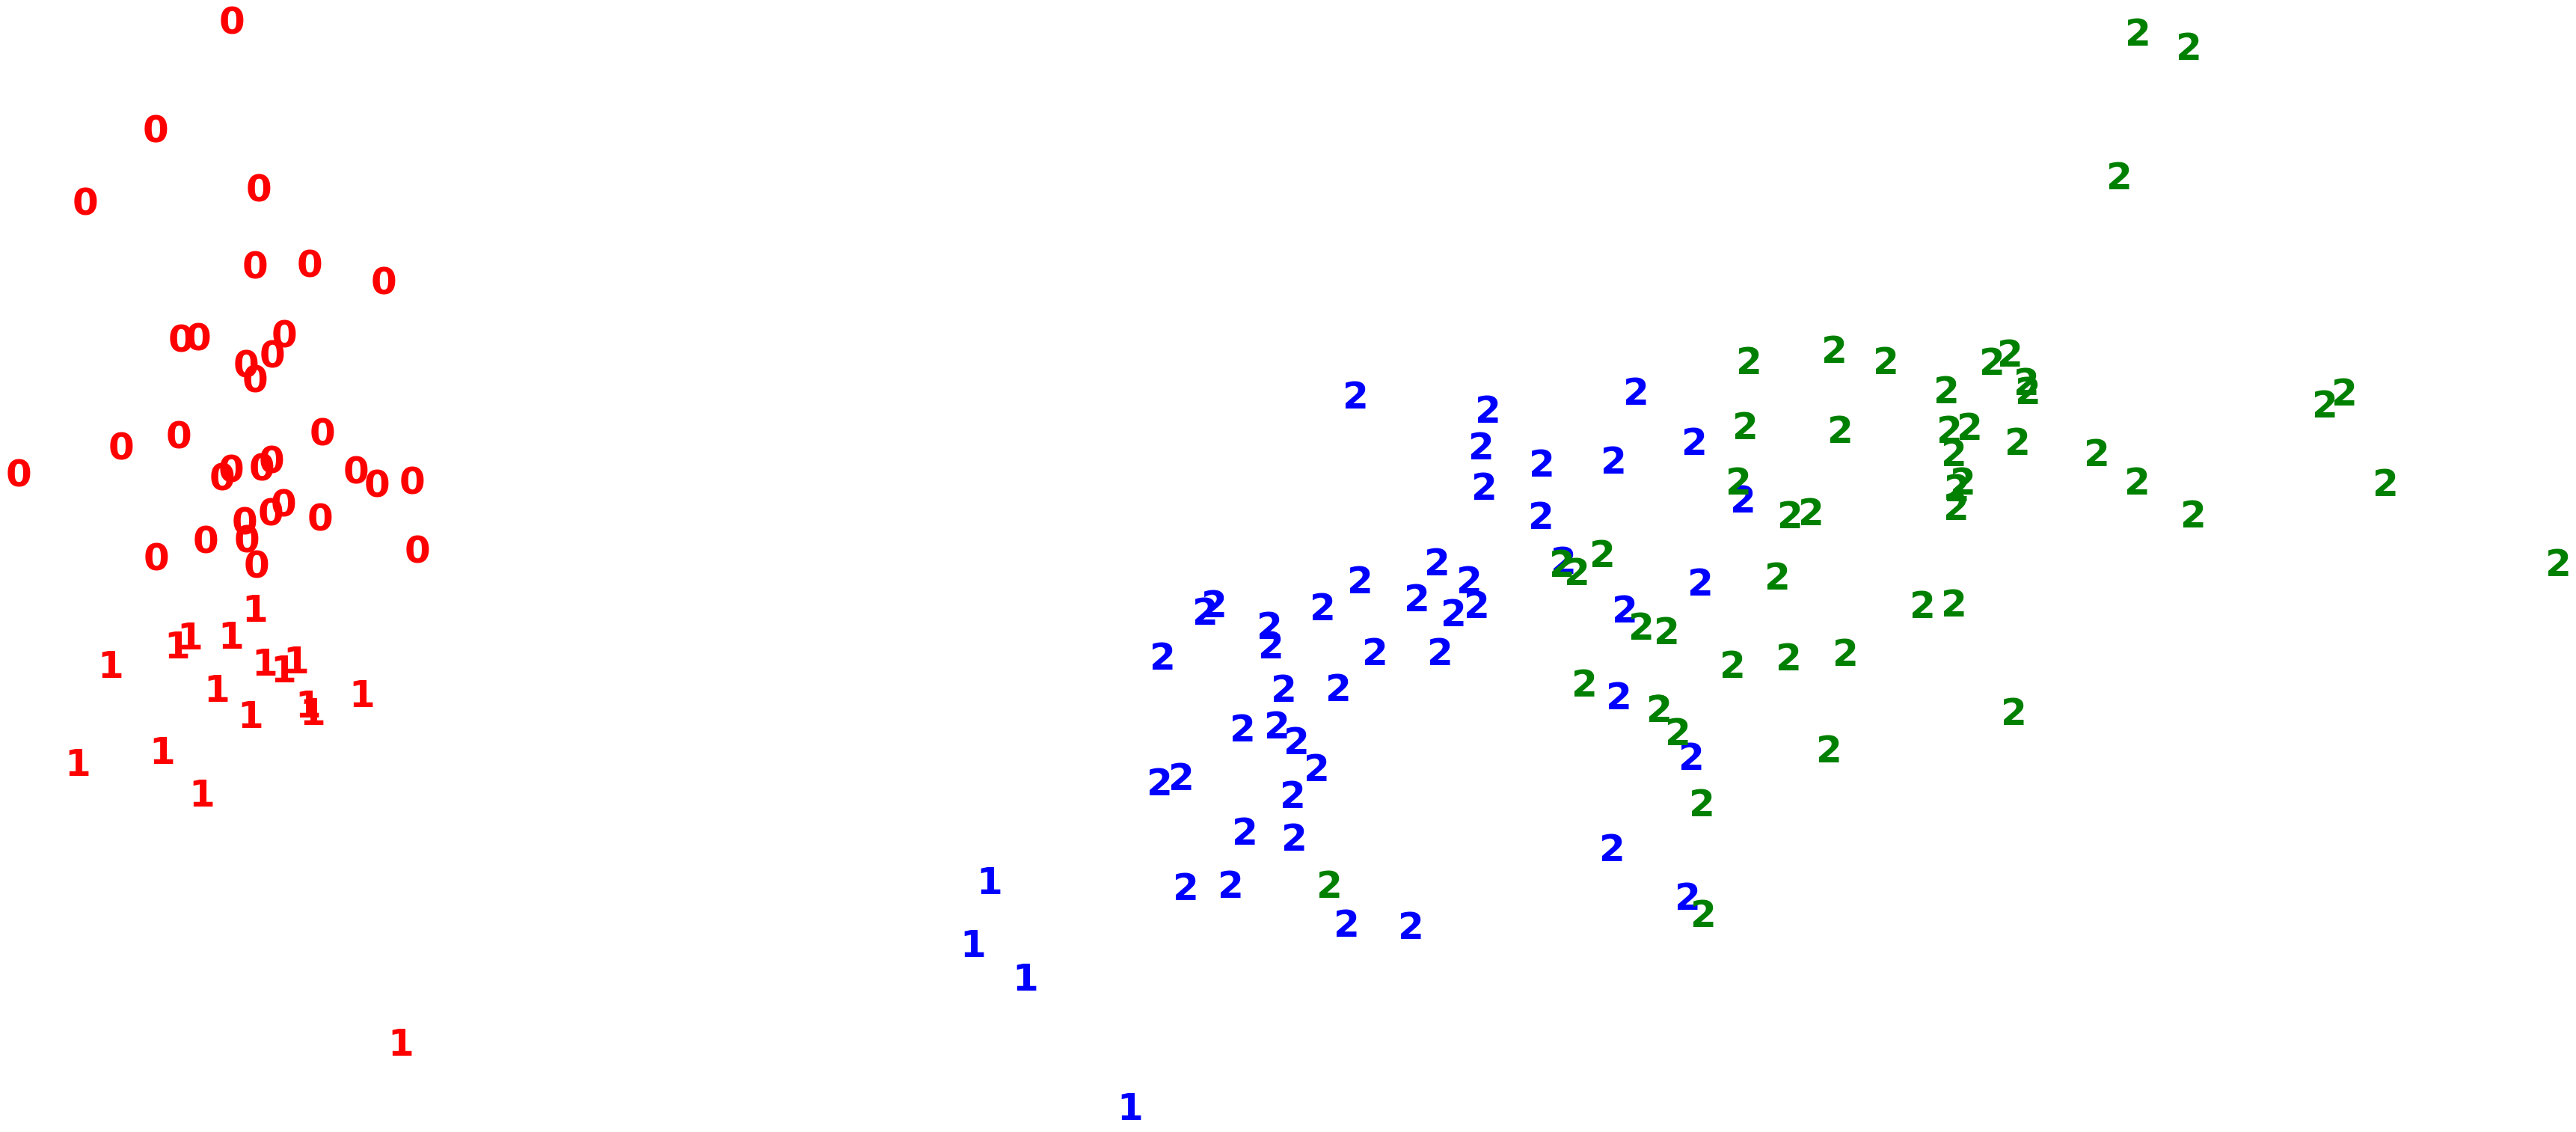

In [14]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

<font color='red'> Heart Diseases Data Set

In [23]:
df2 = pd.read_csv('data/heart.csv')

In [37]:
df2.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [21]:
df2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
X = df2.drop('target', axis=1)
y = df2. target

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [45]:
scaler = StandardScaler()
bütün_veri = scaler.fit_transform(df2)

C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
C = kmeans.cluster_centers_

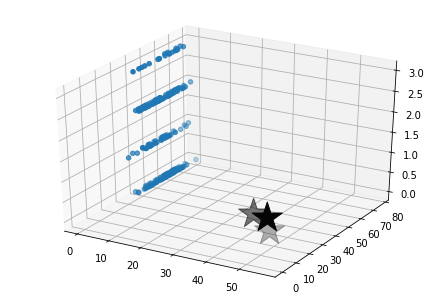

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df2.sex, df2.age, df2.cp)
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', c='#050505', s=1000)

18.8 ms ± 740 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


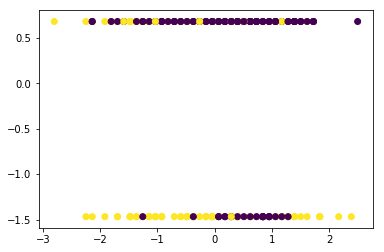

In [46]:
k_ortalama = KMeans(n_clusters=2, random_state=40)
%timeit k_ortalama.fit(bütün_veri)
y_pred = k_ortalama.predict(bütün_veri)

# Plot the solution.
plt.scatter(bütün_veri[:,0], bütün_veri[:,1], c=y_pred)
plt.show()

14.4 ms ± 456 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


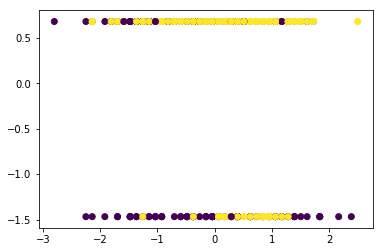

In [47]:
mini_batch_k_ortalama = MiniBatchKMeans(n_clusters=2, random_state=40)
%timeit mini_batch_k_ortalama.fit(bütün_veri)
y_pred_mini = mini_batch_k_ortalama.predict(bütün_veri)

# Plot the solution.
plt.scatter(bütün_veri[:,0], bütün_veri[:,1], c=y_pred_mini)
plt.show()